Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/philosopher/3/'

N = 1_000
M = 50_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}4/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}4/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}4/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}4/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 22:14:32 2025 +0200) (512.94ms ela...,0.1960,0.000,0.290,0.32,0.10,8.54,57.47 C,Nominal
1,(Tue Apr 15 22:14:32 2025 +0200) (508.12ms ela...,0.4710,0.041,0.470,0.76,0.28,23.28,58.12 C,Nominal
2,(Tue Apr 15 22:14:33 2025 +0200) (505.71ms ela...,1.0200,0.000,0.287,1.14,0.16,13.17,58.12 C,Nominal
3,(Tue Apr 15 22:14:33 2025 +0200) (508.77ms ela...,0.0555,0.000,0.250,0.10,0.03,2.36,57.79 C,Nominal
4,(Tue Apr 15 22:14:34 2025 +0200) (508.75ms ela...,0.0475,0.000,0.266,0.10,0.03,2.48,57.79 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(564, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 22:14:43 2025 +0200) (1009.55ms el...,35.4,0.000000,0.988,37.34,3.92,98.50,56.14 C,Nominal
1,(Tue Apr 15 22:14:44 2025 +0200) (1008.61ms el...,34.2,0.000000,0.519,36.31,3.88,98.06,59.74 C,Nominal
2,(Tue Apr 15 22:14:45 2025 +0200) (1006.21ms el...,34.2,0.000000,0.517,36.33,3.89,98.16,62.40 C,Nominal
3,(Tue Apr 15 22:14:46 2025 +0200) (1005.06ms el...,36.2,0.012100,0.581,38.53,3.95,99.09,64.65 C,Nominal
4,(Tue Apr 15 22:14:47 2025 +0200) (1005.98ms el...,34.3,0.000061,0.610,36.57,3.86,97.55,67.07 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:42:25 2025 +0200) (510.78ms ela...,0.2300,0.000,0.253,0.30,0.06,4.55,53.54 C,Nominal
1,(Tue Apr 15 21:42:26 2025 +0200) (509.01ms ela...,1.1900,0.035,0.374,1.42,0.26,22.19,53.60 C,Nominal
2,(Tue Apr 15 21:42:26 2025 +0200) (507.85ms ela...,0.0815,0.000,0.248,0.12,0.03,2.53,53.60 C,Nominal
3,(Tue Apr 15 21:42:27 2025 +0200) (507.90ms ela...,0.0607,0.000,0.286,0.11,0.03,2.35,53.59 C,Nominal
4,(Tue Apr 15 21:42:27 2025 +0200) (507.63ms ela...,2.9600,0.000,0.383,3.27,0.60,50.11,53.59 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1796, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 21:42:37 2025 +0200) (1008.41ms el...,27.9,0.0000,0.484,28.59,3.86,97.82,54.68 C,Nominal
1,(Tue Apr 15 21:42:38 2025 +0200) (1005.02ms el...,30.6,0.0361,0.933,31.50,3.96,99.30,58.19 C,Nominal
2,(Tue Apr 15 21:42:39 2025 +0200) (1004.94ms el...,29.0,0.0000,0.704,29.72,3.89,98.27,61.04 C,Nominal
3,(Tue Apr 15 21:42:40 2025 +0200) (1005.00ms el...,28.5,0.0129,0.609,29.17,3.87,97.98,63.17 C,Nominal
4,(Tue Apr 15 21:42:41 2025 +0200) (1004.85ms el...,27.8,0.0000,0.458,28.40,3.80,97.42,65.08 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 22:14:32,0.1960,0.000,0.290,0.32,0.10,8.54,57.47,Nominal,512.94
1,2025-04-15 22:14:32,0.4710,0.041,0.470,0.76,0.28,23.28,58.12,Nominal,508.12
2,2025-04-15 22:14:33,1.0200,0.000,0.287,1.14,0.16,13.17,58.12,Nominal,505.71
3,2025-04-15 22:14:33,0.0555,0.000,0.250,0.10,0.03,2.36,57.79,Nominal,508.77
4,2025-04-15 22:14:34,0.0475,0.000,0.266,0.10,0.03,2.48,57.79,Nominal,508.75


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(564, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 22:14:43,35.4,0.000000,0.988,37.34,3.92,98.50,56.14,Nominal,1009.55
1,2025-04-15 22:14:44,34.2,0.000000,0.519,36.31,3.88,98.06,59.74,Nominal,1008.61
2,2025-04-15 22:14:45,34.2,0.000000,0.517,36.33,3.89,98.16,62.40,Nominal,1006.21
3,2025-04-15 22:14:46,36.2,0.012100,0.581,38.53,3.95,99.09,64.65,Nominal,1005.06
4,2025-04-15 22:14:47,34.3,0.000061,0.610,36.57,3.86,97.55,67.07,Nominal,1005.98


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:42:25,0.2300,0.000,0.253,0.30,0.06,4.55,53.54,Nominal,510.78
1,2025-04-15 21:42:26,1.1900,0.035,0.374,1.42,0.26,22.19,53.60,Nominal,509.01
2,2025-04-15 21:42:26,0.0815,0.000,0.248,0.12,0.03,2.53,53.60,Nominal,507.85
3,2025-04-15 21:42:27,0.0607,0.000,0.286,0.11,0.03,2.35,53.59,Nominal,507.90
4,2025-04-15 21:42:27,2.9600,0.000,0.383,3.27,0.60,50.11,53.59,Nominal,507.63


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1796, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 21:42:37,27.9,0.0000,0.484,28.59,3.86,97.82,54.68,Nominal,1008.41
1,2025-04-15 21:42:38,30.6,0.0361,0.933,31.50,3.96,99.30,58.19,Nominal,1005.02
2,2025-04-15 21:42:39,29.0,0.0000,0.704,29.72,3.89,98.27,61.04,Nominal,1004.94
3,2025-04-15 21:42:40,28.5,0.0129,0.609,29.17,3.87,97.98,63.17,Nominal,1005.00
4,2025-04-15 21:42:41,27.8,0.0000,0.458,28.40,3.80,97.42,65.08,Nominal,1004.85


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


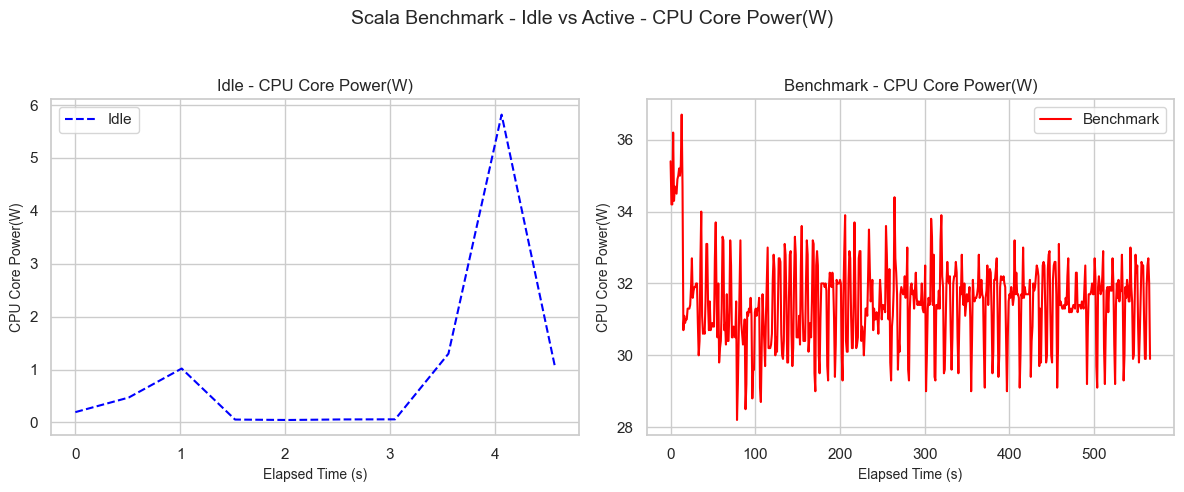

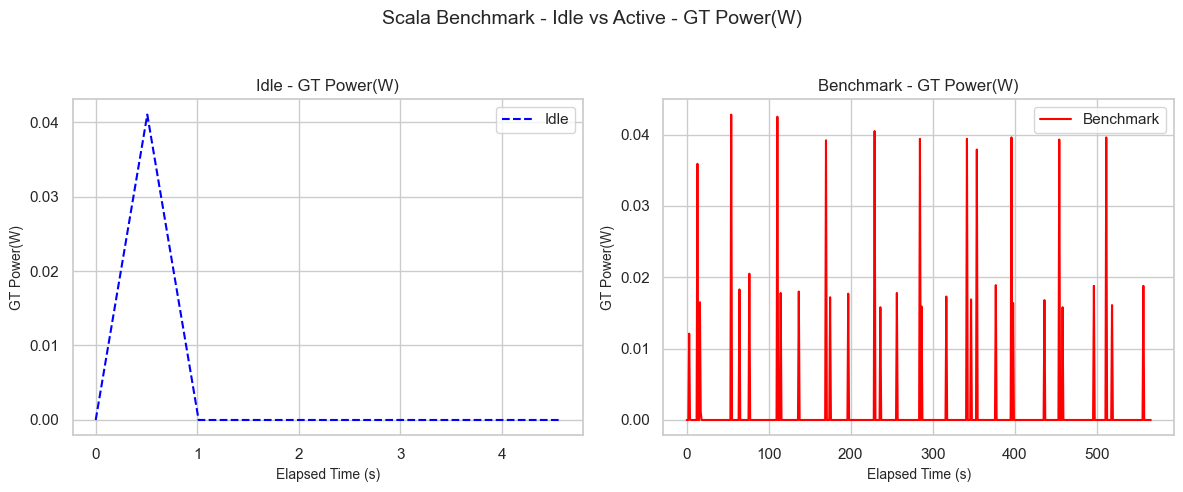

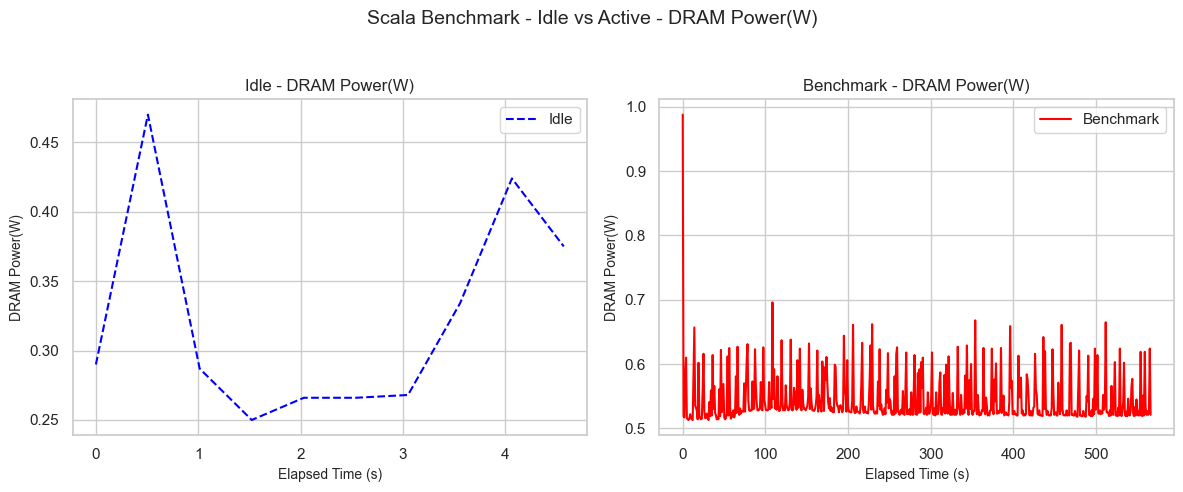

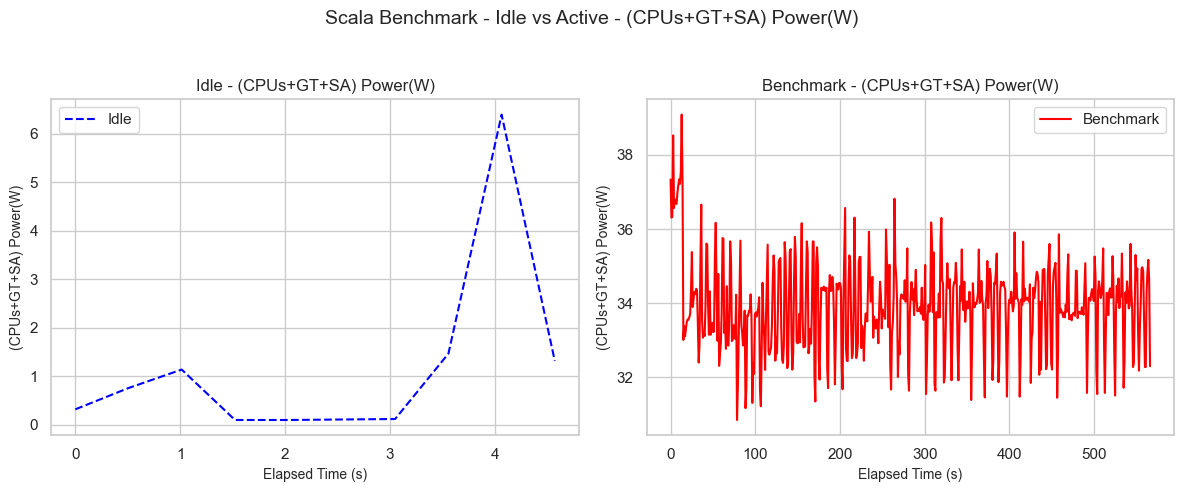

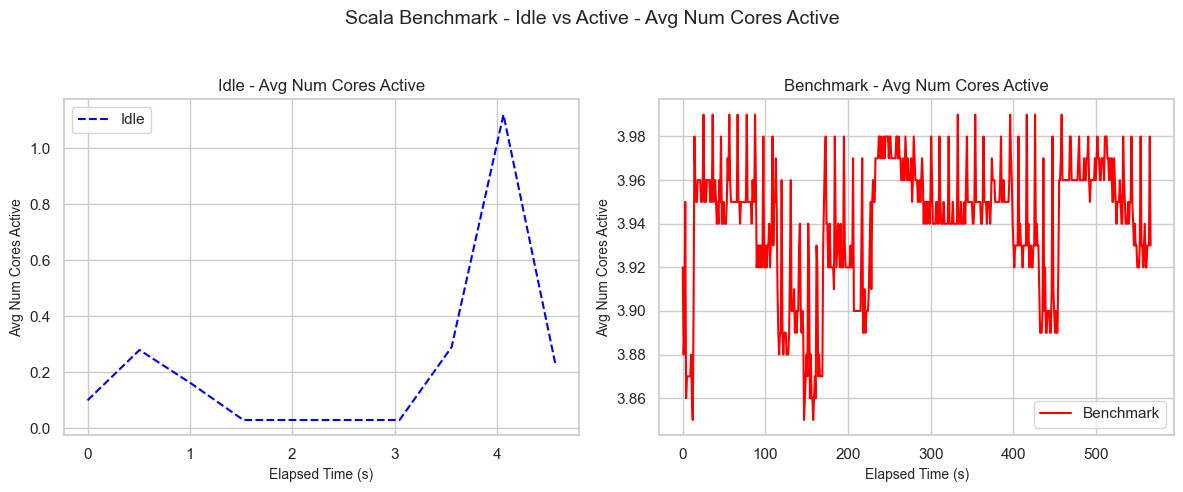

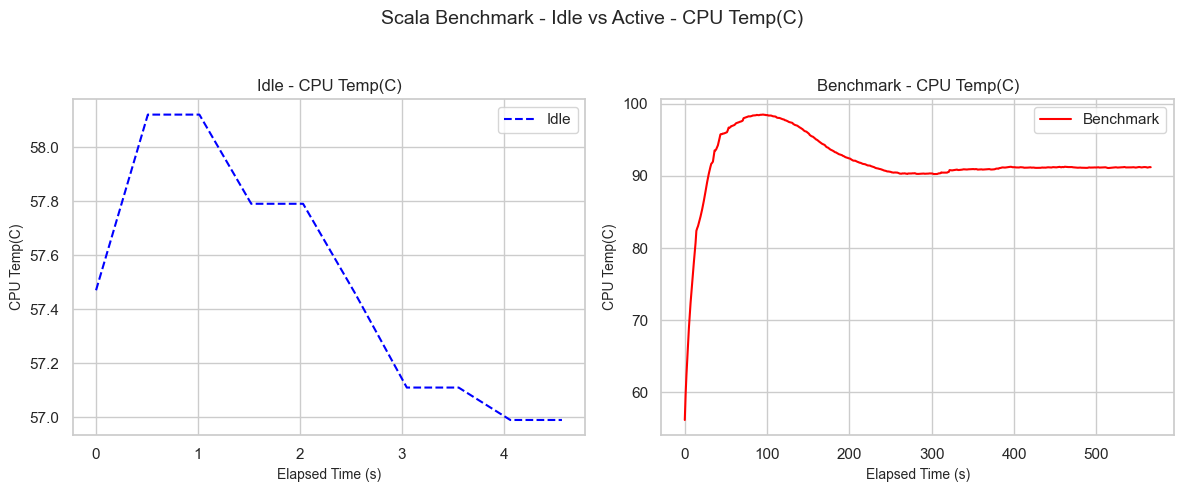

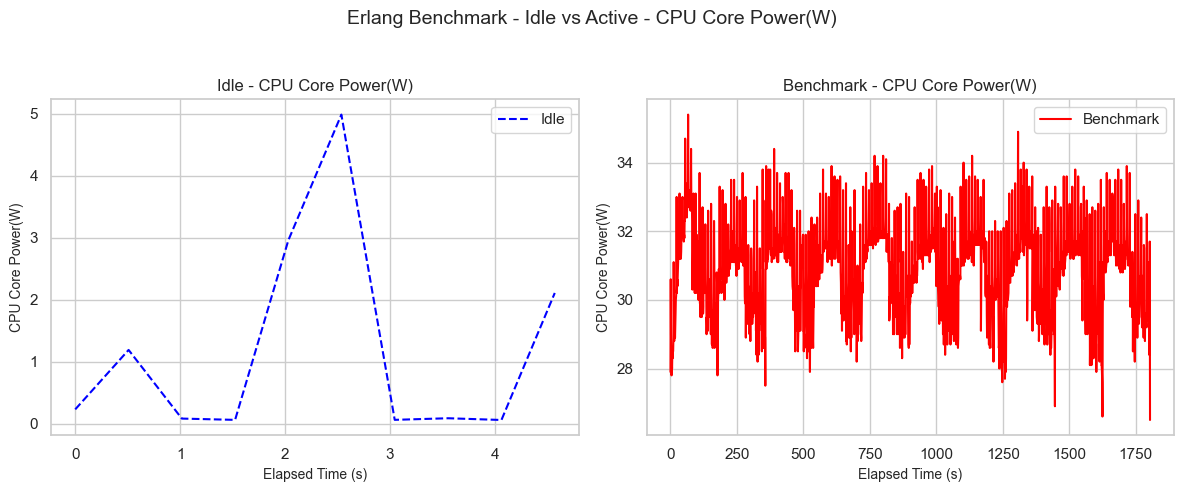

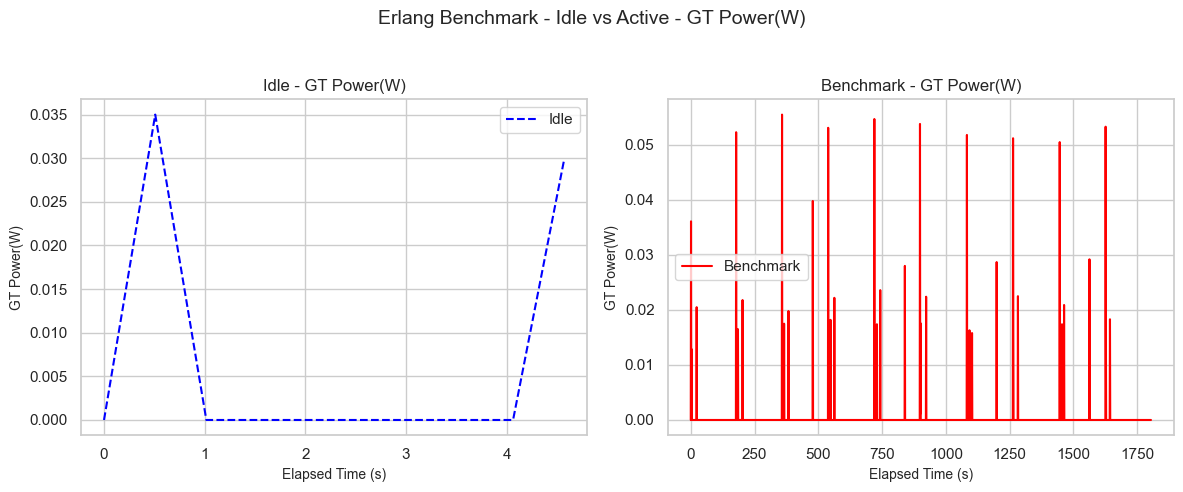

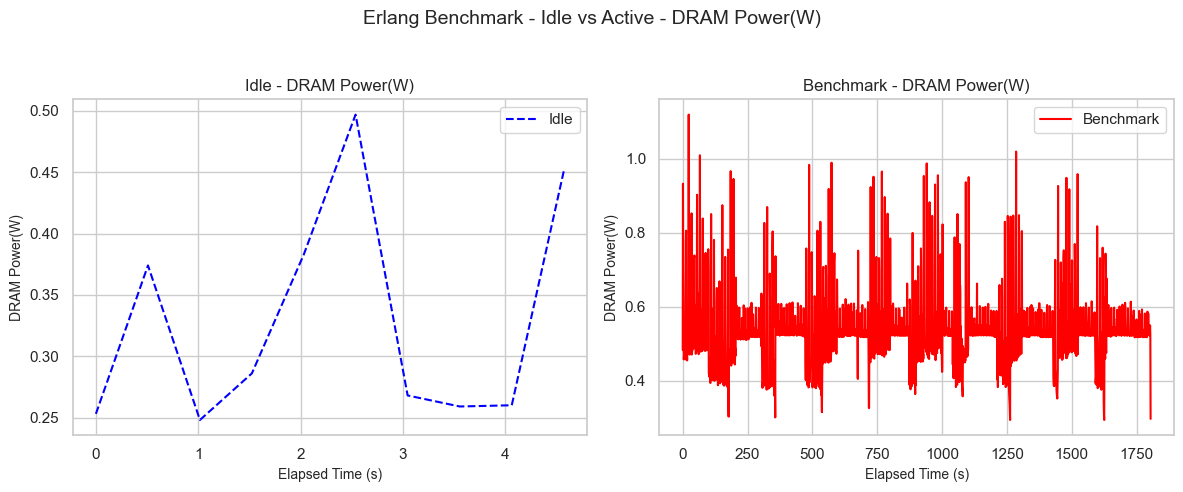

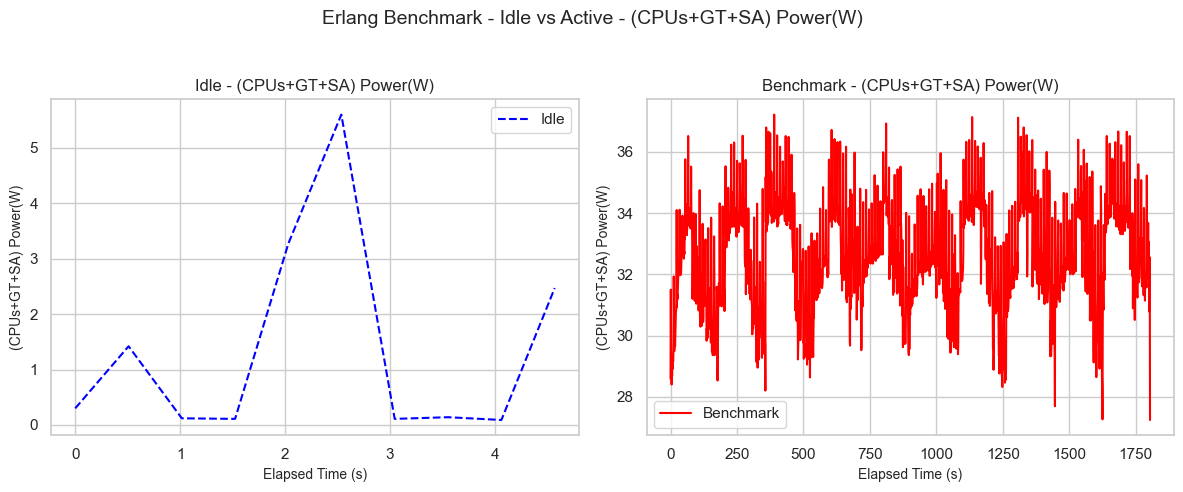

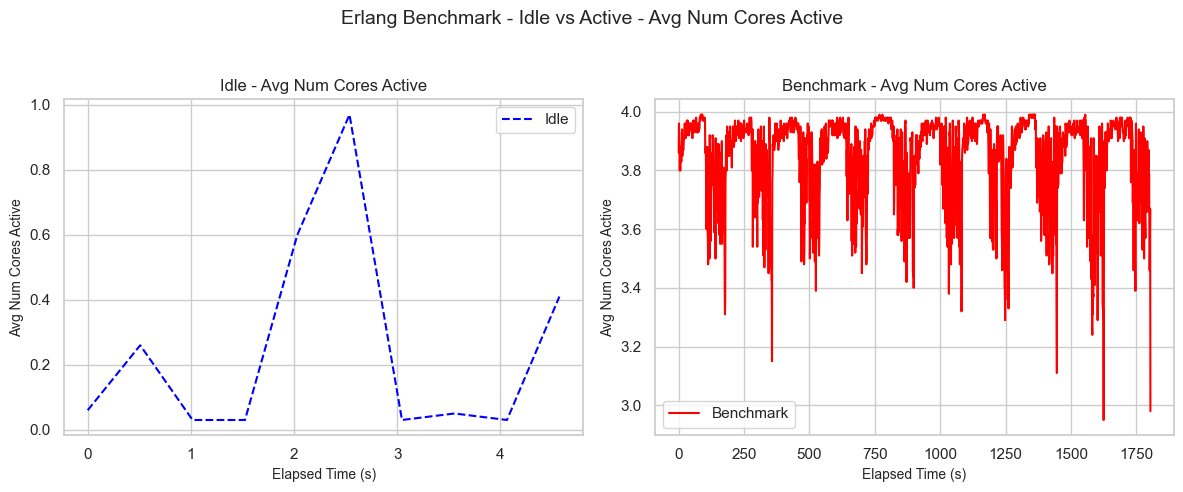

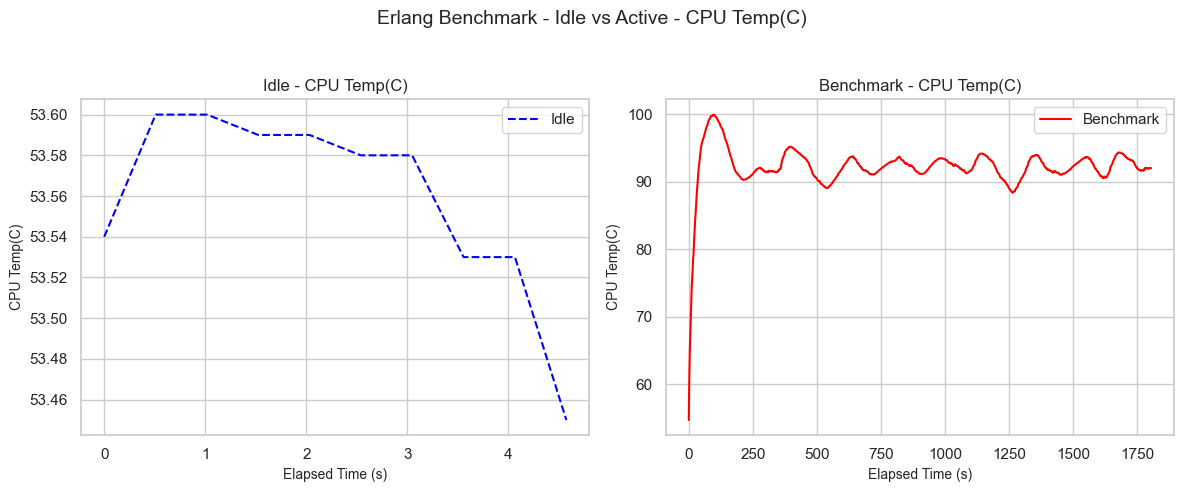

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

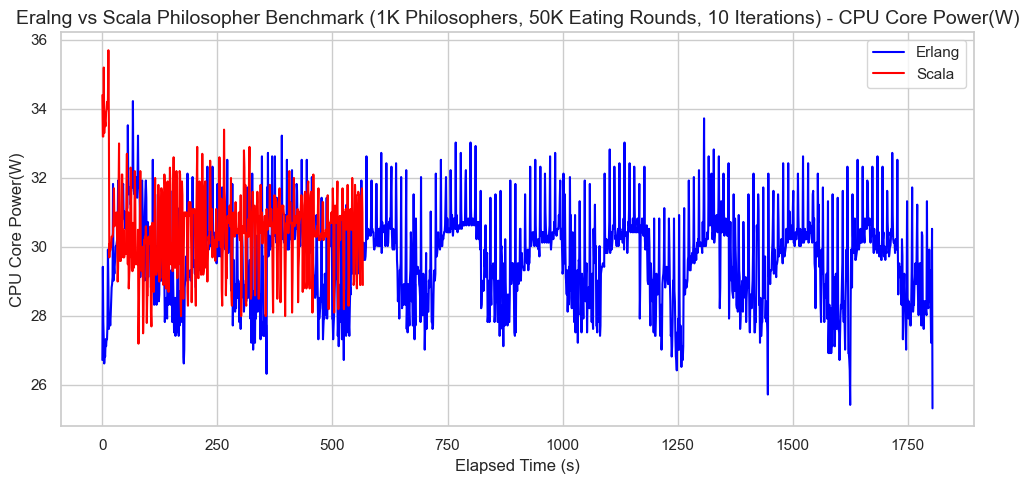

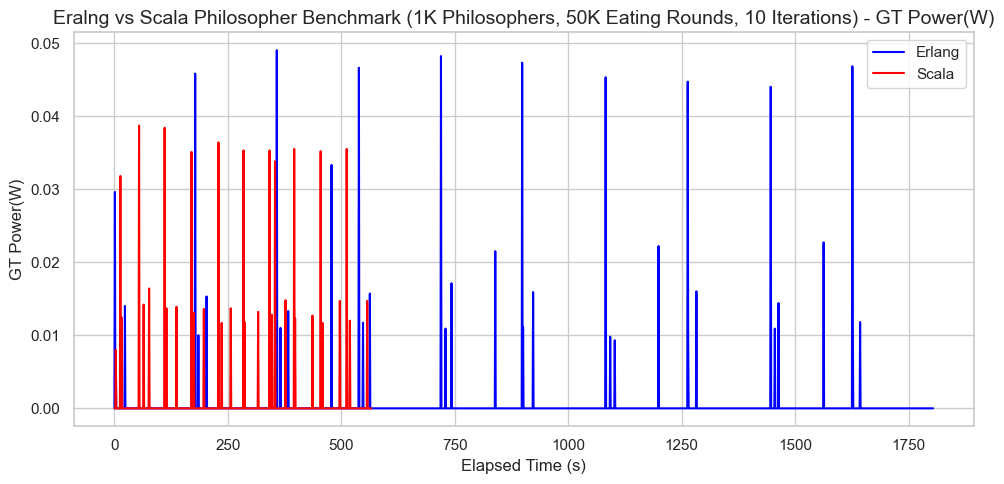

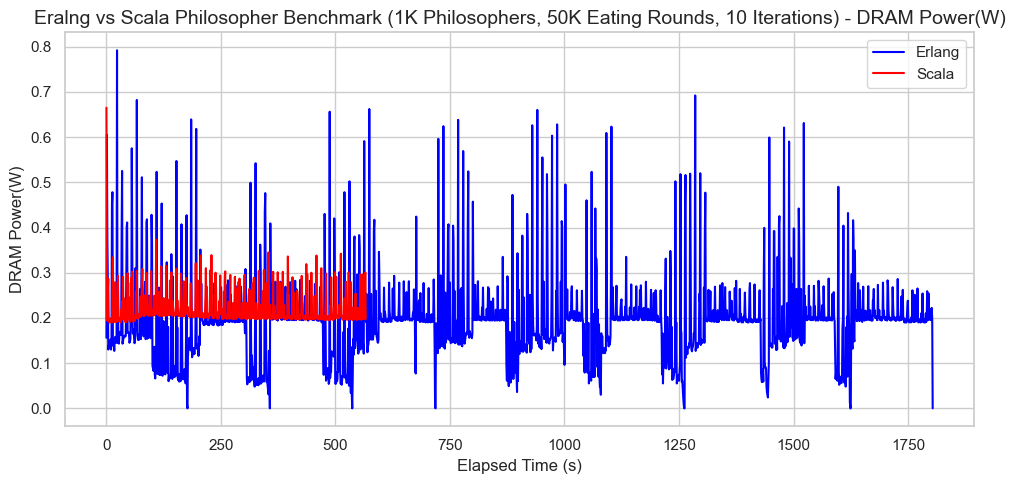

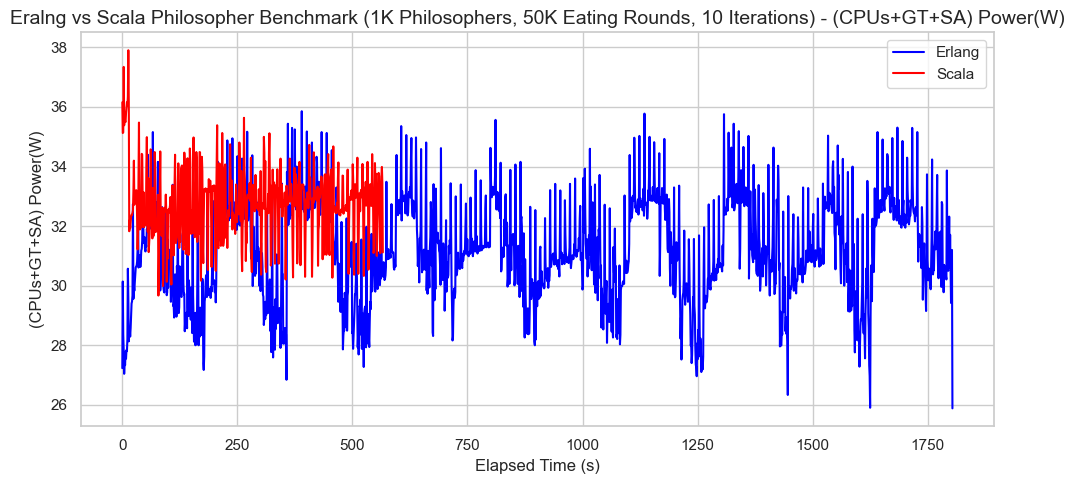

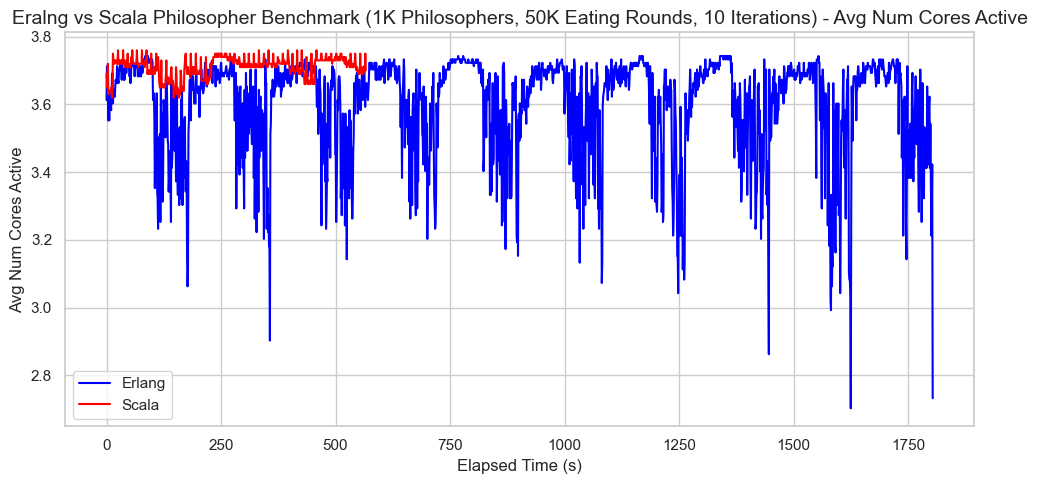

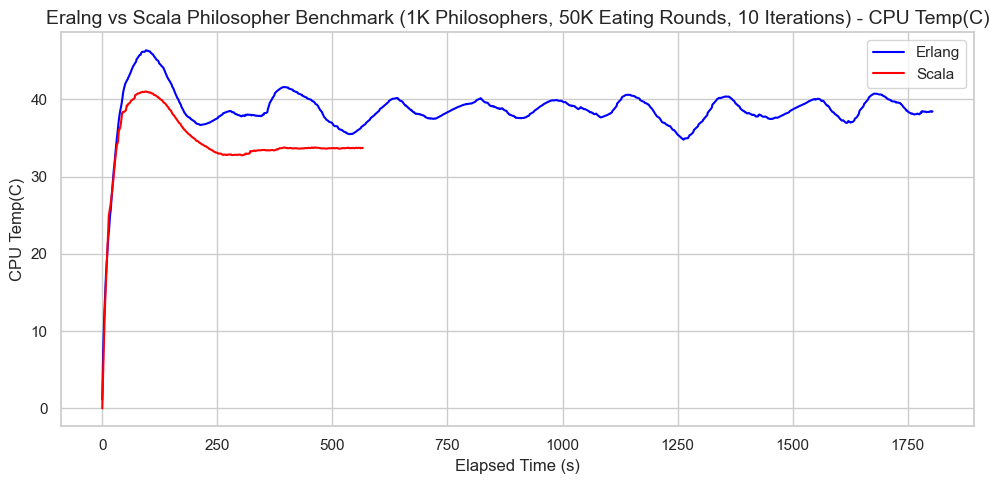

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.475691
GT Power(W)              -0.002716
DRAM Power(W)             0.221332
(CPUs+GT+SA) Power(W)    32.748411
CPU Temp(C)              34.395567
Avg Num Cores Active      3.710213
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        29.677001
GT Power(W)              -0.005925
DRAM Power(W)             0.192508
(CPUs+GT+SA) Power(W)    31.179856
CPU Temp(C)              38.615282
Avg Num Cores Active      3.600138
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 17407.828094891785 Joules
Erlang Benchmark: 53910.125275192455 Joules
